In [1]:
!pip install wolta

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wolta.feature_tools import list_deletings
from wolta.data_tools import make_null
from wolta.data_tools import seek_null
from wolta.data_tools import unique_amounts
from sklearn.preprocessing import StandardScaler, LabelEncoder
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# data exploration

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



1. **age**: This is a numeric variable representing the age of the client.
   
2. **job**: Type of job (categorical):
   - "admin."
   - "unknown"
   - "unemployed"
   - "management"
   - "housemaid"
   - "entrepreneur"
   - "student"
   - "blue-collar"
   - "self-employed"
   - "retired"
   - "technician"
   - "services"

3. **marital**: Marital stat   (categorical):
   - "married"
   - "divorced"
   - "single" (Note: "divorced" includes both divorced and widowed)

4. **education**: Level of education (categorical):
   - "unknown"
   - "secondary"
   - "primary"
   - "tertiary"

5. **default**: Has credit in default? (inary):
   - "yes"
   - "no"

6. **balance**: Average yearly balance in euros (numeric).

7. **housing**: Has housing loan? (binary):
   - "yes"
   - "no"

8. **loan**: Has personal loan? (binary):
   - "yes"
   - "no"

9. **contact**: Contact communication type (categorical):
   - "unknown"
   - "telephone"
   - "cellular"

10. **day**: Last contact day of the month (numeric).

11. **month**: Last contact month of year (categorical):
   - "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"

12. **duration**: Duration of the last contact in seconds (numeric).

13. **campaign**: Number of contacts performed during this campaign for the client (numeric, includes the last contact).

14. **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 indicates the client was not previously contacted).

15. **previous**: Number of contacts performed before this campaign for the client (numeric).

16. **poutcome**: Outcome of the previous marketing campaign (categorical):
   - "unknown"
   - "other"
   - "failure"
   - "success"

**Output Variable (Target):**
17. **y**: Has thetanding of the dataset structure and the significance of each attribute. (binary: "yes","no")

In [4]:
print(df.isnull().sum())
print(df.shape)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
(45211, 17)


In [5]:
unique_amounts(df)

{'age': 77,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 7168,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 12,
 'duration': 1573,
 'campaign': 48,
 'pdays': 559,
 'previous': 41,
 'poutcome': 4,
 'y': 2}

In [6]:
df = make_null(df, 'unknown')
seeked = seek_null(df, print_columns=True)

job has 288 null values
education has 1857 null values
contact has 13020 null values
poutcome has 36959 null values


In [7]:
df = list_deletings(df)

The maximum tolerated null value amount is 9042
contact will be deleted because it has 13020 null values and this is 3978 values more than tolerance
poutcome will be deleted because it has 36959 null values and this is 27917 values more than tolerance
The maximum tolerated unique value amount is 4521 in string data


In [8]:
df['job'] = df['job'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')

In [9]:
df['y'] = df['y'].map({'no':0,'yes':1})

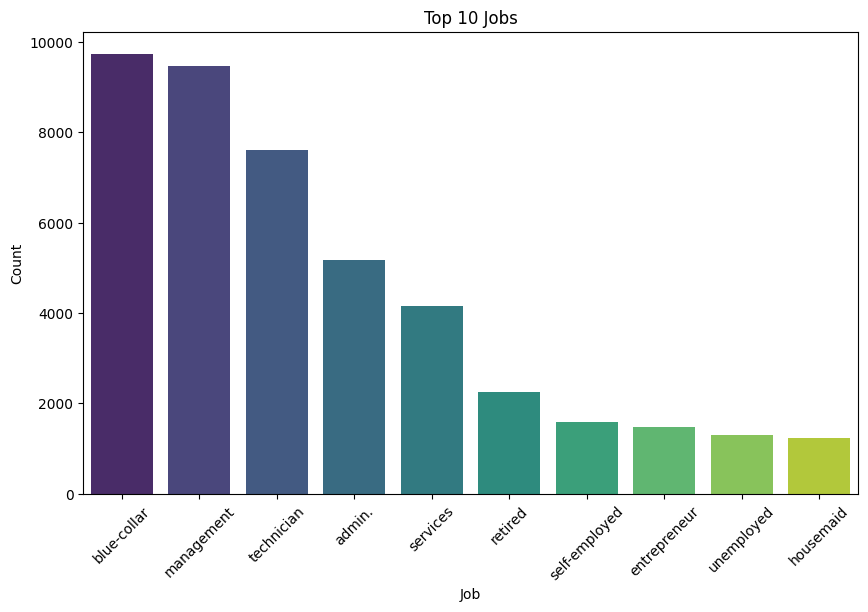

In [10]:
job_counts = df['job'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

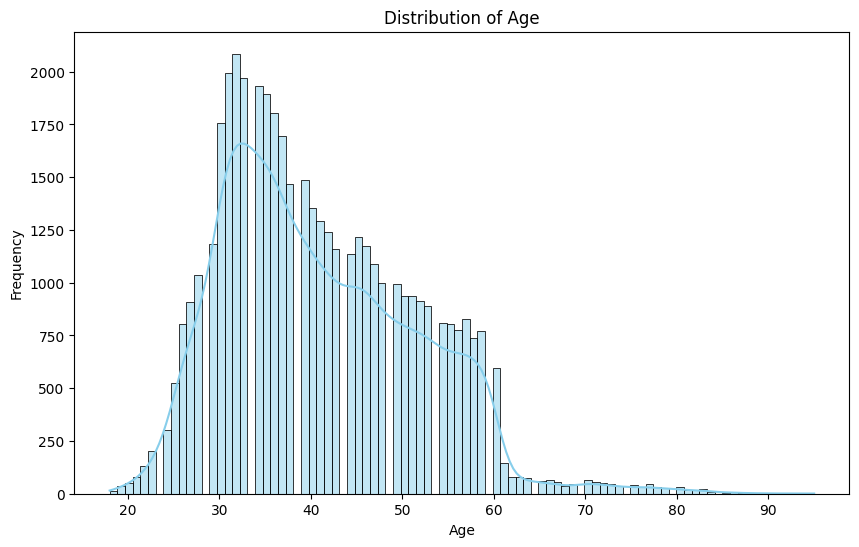

In [11]:
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

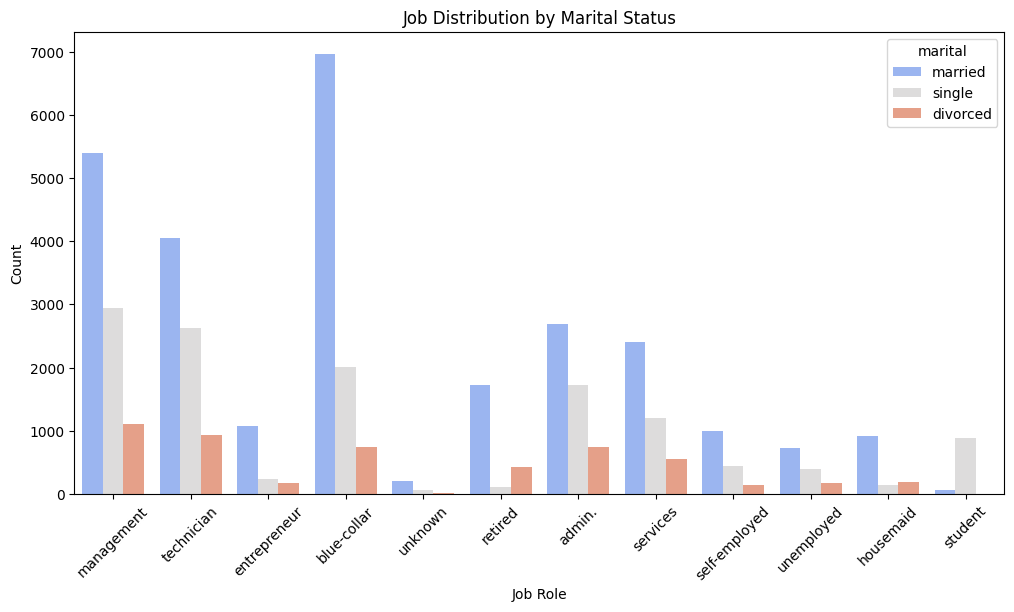

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='marital', palette='coolwarm')
plt.title('Job Distribution by Marital Status')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

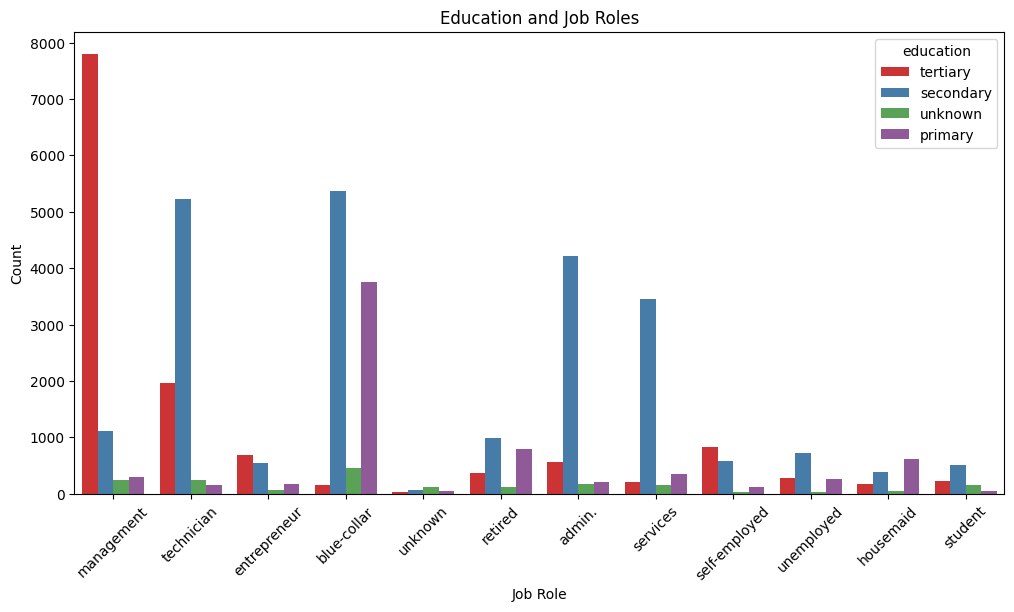

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='education', palette='Set1')
plt.title('Education and Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

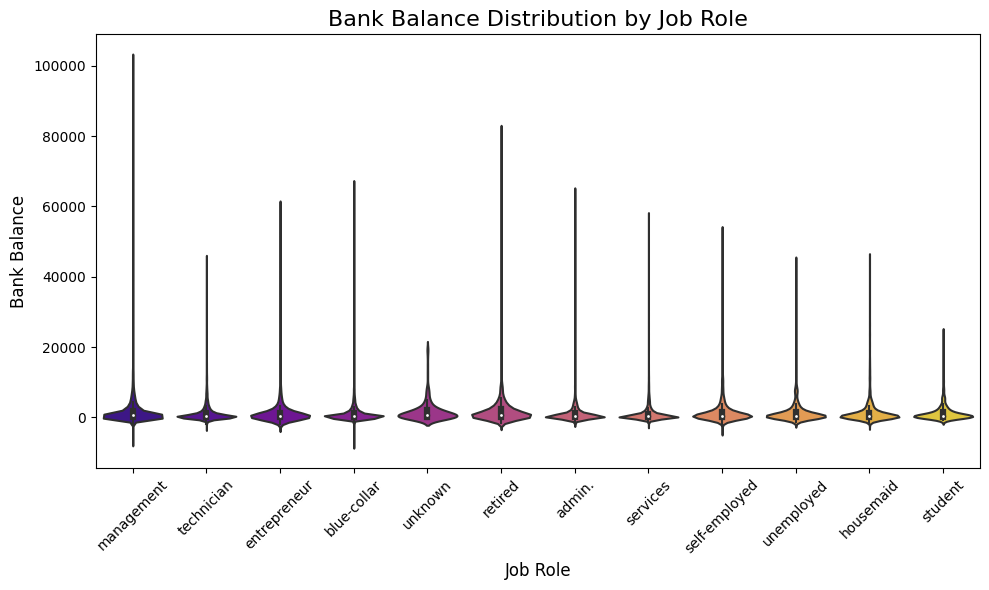

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='job', y='balance', palette='plasma', scale='width')
plt.title('Bank Balance Distribution by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Bank Balance', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()

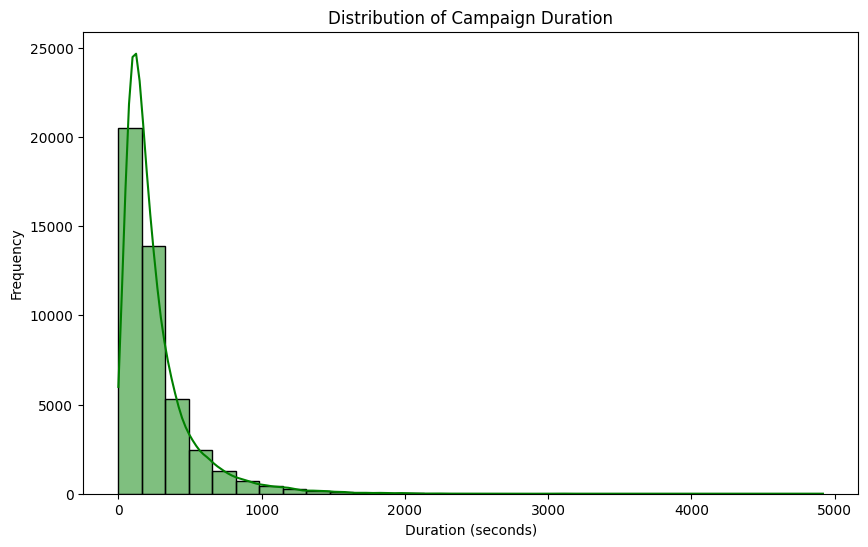

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True, color='green')
plt.title('Distribution of Campaign Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

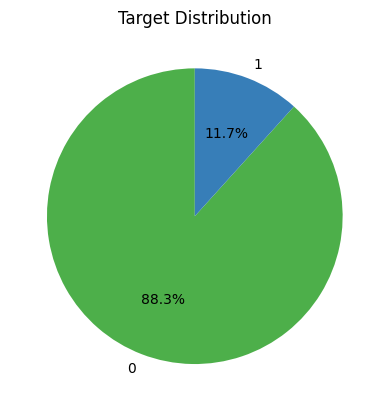

In [16]:
target = df['y'].value_counts()
target.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4daf4a', '#377eb8'])
plt.title('Target Distribution')
plt.ylabel('')
plt.show

In [17]:
encoder = LabelEncoder()

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])

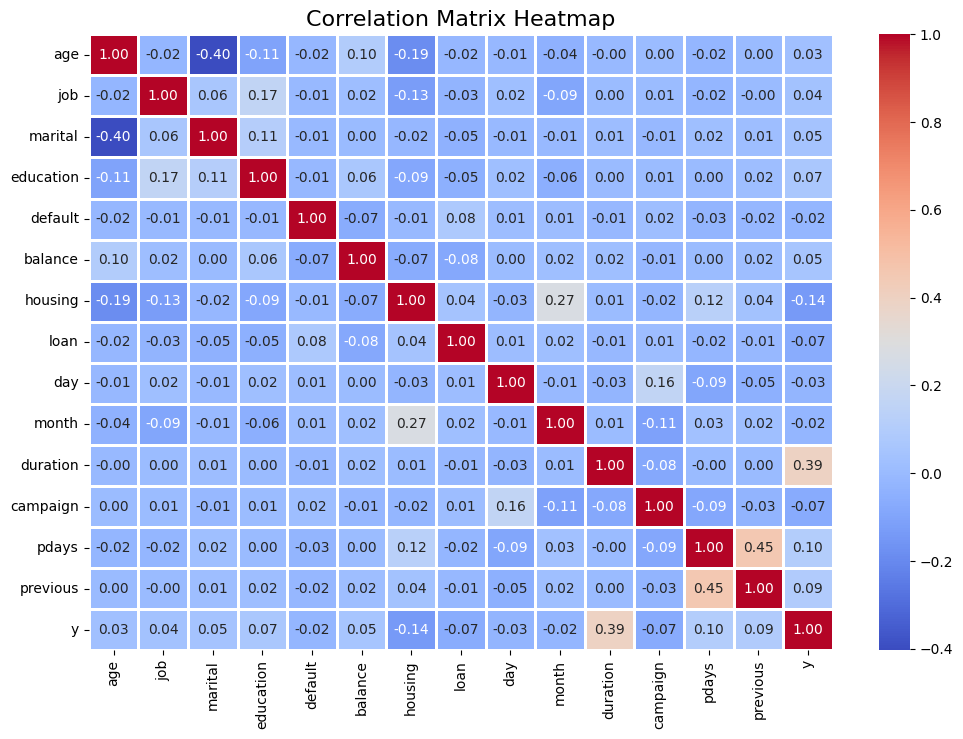

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# train_test_split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('y',axis = 1)
y = df['y']

In [20]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(36168, 14) (9043, 14)


In [21]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                        ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                        ['acc', 'precision', 'f1'],
                        X_train, y_train, X_test, y_test,
                        get_result=True)

AdaBoost
Accuracy Score: 0.8920712153046555
Precision Score: 0.8741445295574619
F1 Score (weighted): 0.8768166178516831
***
CatBoost
Accuracy Score: 0.9036824062811014
Precision Score: 0.8937966197635596
F1 Score (weighted): 0.8966010645415768
***
LightGBM
Accuracy Score: 0.9015813336282207
Precision Score: 0.8914447276810311
F1 Score (weighted): 0.8944835875589302
***
Random Forest
Accuracy Score: 0.8967156916952339
Precision Score: 0.8823680638813564
F1 Score (weighted): 0.8852655977200009
***
Decision Tree
Accuracy Score: 0.8657525157580449
Precision Score: 0.8679827804653558
F1 Score (weighted): 0.866842407616237
***
Extra Tree
Accuracy Score: 0.852814331527148
Precision Score: 0.8501834488437299
F1 Score (weighted): 0.8514722879058488
***
Ridge
Accuracy Score: 0.8848833351763795
Precision Score: 0.8583113964103645
F1 Score (weighted): 0.8490692366419742
***
Perceptron
Accuracy Score: 0.8357845847616941
Precision Score: 0.8413487926278704
F1 Score (weighted): 0.8384812047989886
***

In [22]:
from wolta.model_tools import get_best_model

m = get_best_model(results, 'acc', 'clf', X_train, y_train, behavior='max-best')

Best Algorithm is cat with the score of 0.9036824062811014


In [23]:
# # Define the objective function for Optuna
# def objective(trial):
#     # Define the hyperparameters to search over
#     param = {
#         'depth': trial.suggest_int('depth', 4, 12),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10),
#         'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
#         'random_strength': trial.suggest_uniform('random_strength', 0.0, 10.0),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.0, 10.0),
#     }
    
#     # Initialize the CatBoost model with these hyperparameters
#     model = CatBoostClassifier(**param, 
#                                random_state=42,
#                                verbose=0)  # Suppress verbose output
    
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions and calculate accuracy
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy

# # Create the Optuna study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print("Best hyperparameters:", study.best_params)

In [24]:
param = {'depth': 7, 'learning_rate': 0.05739895035475491, 'iterations': 948, 'l2_leaf_reg': 0.11836951294636794, 'bagging_temperature': 0.7397097378145897, 'random_strength': 1.7298828876837877, 'border_count': 115, 'scale_pos_weight': 1.246567999264173}

# train model

In [25]:
from sklearn.metrics import classification_report as rep

model = CatBoostClassifier(**param, 
                            random_state=42,
                            verbose=0)  

model.fit(X_train, y_train)

In [26]:
y_pred = model.predict(X_test)
print(rep(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7952
           1       0.64      0.52      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.74      0.76      9043
weighted avg       0.90      0.91      0.90      9043



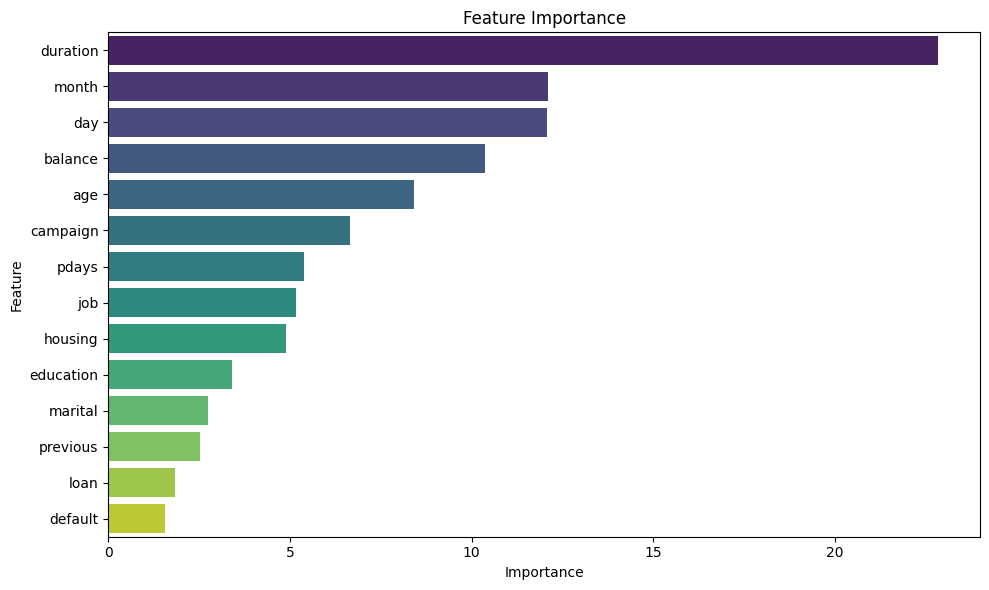

In [27]:
feature_importances = model.get_feature_importance()
feature_names = X.columns 

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()